In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import matplotlib as mpl

from scipy import optimize, stats

In [51]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=13)

if os.environ['USER'] == 'dhayaa':
    os.environ['PATH'] = f"{os.environ['PATH']}:/software/texlive-2022-el8-x86_64/bin/x86_64-linux/"


COLORS = ["f07167","219ebc","c767ac","E0A100","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS ]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Plot Bmode

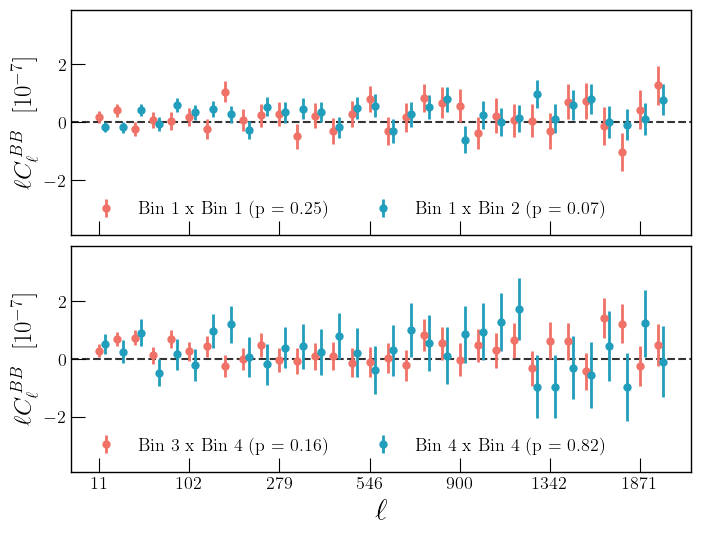

In [69]:
Y = np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode.npy')
N = np.mean(np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_Noise.npy')[:], axis = 0)
S = np.std(np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_Noise.npy'), axis = 0)
Y = Y - N
l = np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_ell.npy')


fig, ax = plt.subplots(2, 1, figsize = (8, 6), sharex = True, sharey = True)
plt.subplots_adjust(hspace = 0.05)
bins = [(1,1), (1,2), (3,4), (4,4)]
off  = [0, 0.3, 0, 0.3]
axs  = [0, 0, 1, 1]
for ax_i, b_i, f in zip(axs, bins, off):
    
    i, j = b_i
    
    cov = np.cov(np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_Noise.npy')[:, i-1, j-1, 3].T)
    N = 1000
    r = Y[i-1, j-1, 3]
    hartlap  = ((N - len(r) - 2) / (N -  1))
    dodelson = 1 / (1 + (len(r) - 3) * (N - len(r) - 2) / (N - len(r) - 1) / (N - len(r) - 4) )
    inv_cov = np.linalg.inv(cov) * hartlap * dodelson
    chi2 = r @ inv_cov @ r
    
    vals = chi2 / len(r), 1 - stats.chi2(df = len(r)).cdf(chi2)
    
    scale = l * 1e7
    c = ax[ax_i].errorbar(np.arange(len(Y[0,0,3])) + f, scale * Y[i-1, j-1, 3], yerr = S[i-1, j-1, 3] * scale, 
                          lw = 0, elinewidth = 2, markersize = 5, marker = 'o', 
                          label = f'Bin {i} x Bin {j} (p = {vals[1]:.2f})')
    
[a.set_ylim(-3.9, 3.9) for a in ax]
[a.legend(fontsize = 13, frameon = False, ncol = 2, loc = 'lower left') for a in ax]
[a.axhline(0, color = 'k', ls = '--', alpha = 0.8, zorder = -100) for a in ax]   
[a.set_ylabel(r'$\ell C_{\ell}^{\, BB}$\,\,\,\,[$10^{-7}$]', size = 18) for a in ax]
ax[-1].set_xlabel(r'$\ell$', size = 22)

ax[-1].set_xticks(np.arange(0, 31, 5))
ax[-1].set_xticklabels(l[np.arange(0, 31, 5)].astype(int))

plt.savefig('./Bmode_Tomo.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Cursory check of other bins too

1.156909240115651 0.24827023378083035
1.3832872830744725 0.07310084206597978
1.3669685026993659 0.08072116866005596
0.7893770358151506 0.7953614785792456
0.7086439422557069 0.8882357696861195
0.9546133526046233 0.5400643752925798
0.9631209106561114 0.5261747974794092
0.9491485008254368 0.5490053077161654
1.247276337187155 0.15877619806893717
0.7716672287800362 0.8182547594712951


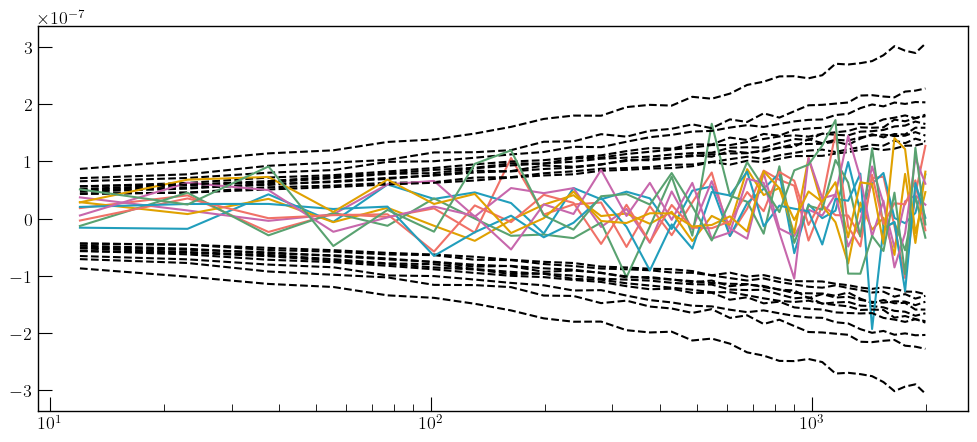

In [3]:
Y = np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode.npy')
N = np.mean(np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_Noise.npy')[:], axis = 0)
S = np.std(np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_Noise.npy'), axis = 0)
Y = Y - N
l = np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_ell.npy')


plt.figure(figsize = (12,5))
for i in range(4):
    for j in range(i, 4):
        
        cov = np.cov(np.load('/scratch/midway3/dhayaa/SHEARTESTS_20240901/BmodeTomo/Bmode_Noise.npy')[:, i, j, 3].T)
        r = Y[i, j, 3]
#         r[0] = 0
        
#         plt.plot(1e8 * l * Y[i, j, 3])
        plt.plot(l, l * Y[i, j, 3])
        plt.plot(l, l * 2.5*S[i, j, 3], ls = '--', color = 'k')
        plt.plot(l, l * -2.5*S[i, j, 3], ls = '--', color = 'k')
        
        N = 1000
        hartlap  = ((N - len(r) - 2) / (N -  1))
        dodelson = 1 / (1 + (len(r) - 3) * (N - len(r) - 2) / (N - len(r) - 1) / (N - len(r) - 4) )
        inv_cov = np.linalg.inv(cov) * hartlap * dodelson
        chi2 = r @ inv_cov @ r
        print(chi2 / len(r), 1 - stats.chi2(df = len(r)).cdf(chi2))
        
#         break
#     break
    
plt.xscale('log')